<a href="https://colab.research.google.com/github/sinwoo1212/oss2025/blob/main/%EA%B8%80%EB%A1%9C%EB%B2%8C_%EC%82%AC%EC%9D%B4%EB%B2%84_%EB%B3%B4%EC%95%88_%EC%9C%84%ED%98%91_2015_2024_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-cybersecurity-threats-2015-2024/Global_Cybersecurity_Threats_2015-2024.csv


## Title: Cybersecurity Threats (2015-2024)

#### A decade of rising cyber threats, from ransomware attacks to AI-driven breaches, shaping global security challenges.

In [ ]:
import seaborn  as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## import dataset

In [ ]:
df = pd.read_csv('/kaggle/input/global-cybersecurity-threats-2015-2024/Global_Cybersecurity_Threats_2015-2024.csv')

In [ ]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [ ]:
df.tail()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9
2999,Germany,2021,SQL Injection,Retail,48.20,480984,Unknown,Zero-day,VPN,64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [ ]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [ ]:
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

In [ ]:
df.shape

(3000, 10)

In [ ]:
df.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

## data visualizations

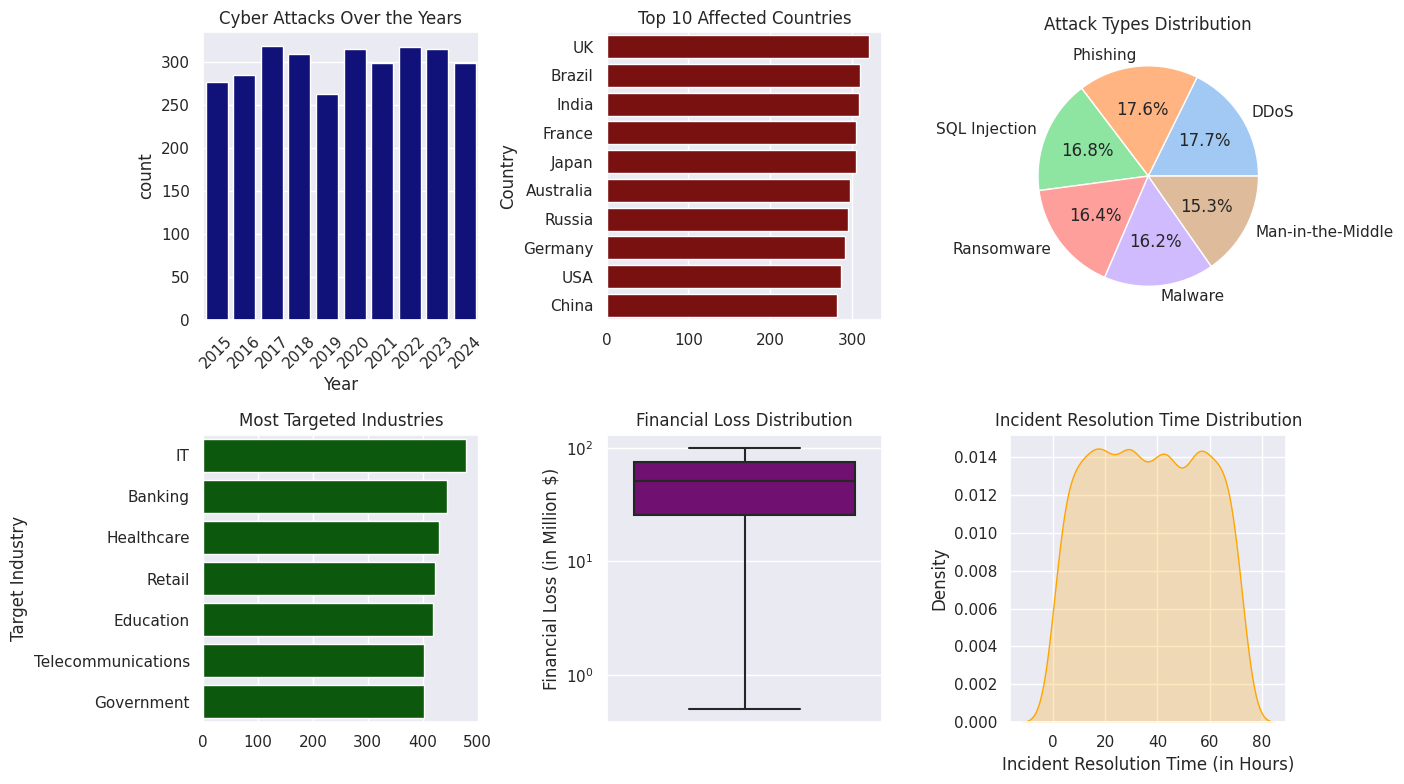

In [ ]:
# Set seaborn style
sns.set_theme(style="darkgrid", palette="deep")

# Figure size
plt.figure(figsize=(14, 8))

# 1. Number of Attacks per Year
plt.subplot(2, 3, 1)
sns.countplot(data=df, x="Year", order=sorted(df["Year"].unique()), color="darkblue")
plt.xticks(rotation=45)
plt.title("Cyber Attacks Over the Years")

# 2. Top 10 Most Affected Countries
plt.subplot(2, 3, 2)
top_countries = df["Country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, color="darkred")
plt.title("Top 10 Affected Countries")

# 3. Attack Type Distribution
plt.subplot(2, 3, 3)
df["Attack Type"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.ylabel("")
plt.title("Attack Types Distribution")

# 4. Most Targeted Industries
plt.subplot(2, 3, 4)
top_industries = df["Target Industry"].value_counts().head(10)
sns.barplot(y=top_industries.index, x=top_industries.values, color="darkgreen")
plt.title("Most Targeted Industries")

# 5. Financial Loss Distribution (Boxplot)
plt.subplot(2, 3, 5)
sns.boxplot(data=df, y="Financial Loss (in Million $)", color="purple")
plt.yscale("log")
plt.title("Financial Loss Distribution")

# 6. Incident Resolution Time Analysis (KDE Plot)
plt.subplot(2, 3, 6)
sns.kdeplot(df["Incident Resolution Time (in Hours)"], fill=True, color="orange")
plt.title("Incident Resolution Time Distribution")

plt.tight_layout()
plt.show()

## Predictive modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB
None


In [ ]:
# Handling Missing Values
df.dropna(inplace=True)  # Drop rows with missing values

In [ ]:
# Encoding Categorical Features
categorical_columns = ['Country', 'Year', 'Attack Type', 'Target Industry',
                       'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']

In [ ]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future use

In [ ]:
# Defining Features (X) and Target (y)
X = df.drop(columns=["Attack Type"])  # Predicting "Attack Type"
y = df["Attack Type"]

In [ ]:
# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling (for better performance in distance-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Store results
results = {}

In [ ]:
# Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)
}

In [ ]:
# Training and Evaluating Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = acc

# Display Model Performance
print("\nModel Performance Summary:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


Logistic Regression Accuracy: 0.1400
              precision    recall  f1-score   support

           0       0.17      0.18      0.17       111
           1       0.11      0.08      0.09        97
           2       0.06      0.01      0.02        99
           3       0.18      0.33      0.24       103
           4       0.10      0.23      0.14        79
           5       0.19      0.03      0.05       111

    accuracy                           0.14       600
   macro avg       0.13      0.14      0.12       600
weighted avg       0.14      0.14      0.12       600


Decision Tree Accuracy: 0.1600
              precision    recall  f1-score   support

           0       0.19      0.17      0.18       111
           1       0.12      0.13      0.13        97
           2       0.16      0.16      0.16        99
           3       0.18      0.16      0.16       103
           4       0.10      0.10      0.10        79
           5       0.19      0.22      0.20       111

    acc

## Thank you!!!...upvote!!!